# EDA

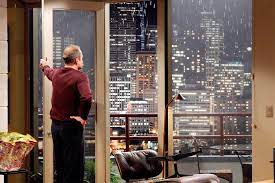

In [572]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [573]:
from sqlalchemy import create_engine

#read the database string from the .env
import os
from dotenv import load_dotenv
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

#import the data to a pandas dataframe
query_string = """SELECT *
FROM 
    eda.king_county_house_details kchd
LEFT JOIN 
    eda.king_county_house_sales kchs
ON 
    kchd.id = kchs.house_id
WHERE 
    kchd.id IS NOT NULL AND kchs.house_id IS NOT NULL
ORDER BY kchd.id;"""
df = pd.read_sql(query_string, db)
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,...,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.000,2.000,1600.000,4168.000,1.500,0.000,0.000,3,7,...,0.000,98126,47.530,-122.381,1190.000,4168.000,2014-07-25,365000.000,9842300095,16724
21593,9842300485,2.000,1.000,1040.000,7372.000,1.000,0.000,0.000,5,7,...,0.000,98126,47.529,-122.378,1930.000,5150.000,2015-03-11,380000.000,9842300485,3258
21594,9842300540,3.000,1.000,1100.000,4128.000,1.000,0.000,0.000,4,7,...,NaN,98126,47.530,-122.379,1510.000,4538.000,2014-06-24,339000.000,9842300540,7615
21595,9895000040,2.000,1.750,1410.000,1005.000,1.500,0.000,0.000,3,9,...,0.000,98027,47.545,-122.018,1440.000,1188.000,2014-07-03,399900.000,9895000040,20964


In [574]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [575]:
# Descripción estadística del dataframe
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [576]:
df = df.fillna(0)
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

In [577]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


In [578]:
df.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
dtype: object

In [579]:
df.nunique()

id               21420
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               752
sqft_living15      777
sqft_lot15        8682
date               372
price             3622
house_id         21420
id               21597
dtype: int64

In [580]:
# df.shape
# df.info()
df.columns
# df.index
# df.dtypes
#df.notnull()
#df.isnull().sum()
#df.duplicated()

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [581]:
df.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
dtype: object

In [582]:
# 1. Identify which neighborhoods are middle class
#    Calculate average price per zipcode
avg_price_by_zipcode = df.groupby('zipcode')['price'].mean().reset_index()

# View the first 5 neighborhoods (zip codes) with their average price
avg_price_by_zipcode.head()


,zipcode,price
0,98001,281194.870
1,98002,234284.035
2,98003,294111.279
3,98004,1356523.991
4,98005,810289.696


In [583]:
## Classify Neighborhoods in Middle Class:

# Calcular los percentiles 25 y 75 de los precios
lower_percentile = df['price'].quantile(0.25)
upper_percentile = df['price'].quantile(0.75)

# Filtrar los códigos postales que tienen un precio promedio dentro de ese rango
middle_class_zipcodes = avg_price_by_zipcode[
    (avg_price_by_zipcode['price'] >= lower_percentile) & (avg_price_by_zipcode['price'] <= upper_percentile)
]

# Ver los barrios de clase media (códigos postales) con sus precios promedio
middle_class_zipcodes


,zipcode,price
6,98007,617254.021
8,98010,423665.990
9,98011,490377.108
10,98014,455617.113
11,98019,424815.063
14,98024,586120.875
15,98027,617053.966
16,98028,462488.869
17,98029,612642.738
22,98034,521740.015


In [584]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [585]:
## Create two new columns with Prices per Sqft
df['cost_feet'] = df['price']/df['sqft_living']
df['cost_feet15'] = df['price']/df['sqft_living15']
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id,cost_feet,cost_feet15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,0.000,0.000,3,7,...,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,125.000,145.631
1,1000102,6.000,3.000,2400.000,9373.000,2.000,0.000,0.000,3,7,...,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,116.667,135.922
2,1200019,4.000,1.750,2060.000,26036.000,1.000,0.000,0.000,4,8,...,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,314.320,250.000
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,273.973,177.778
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,164.336,182.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.000,2.000,1600.000,4168.000,1.500,0.000,0.000,3,7,...,47.530,-122.381,1190.000,4168.000,2014-07-25,365000.000,9842300095,16724,228.125,306.723
21593,9842300485,2.000,1.000,1040.000,7372.000,1.000,0.000,0.000,5,7,...,47.529,-122.378,1930.000,5150.000,2015-03-11,380000.000,9842300485,3258,365.385,196.891
21594,9842300540,3.000,1.000,1100.000,4128.000,1.000,0.000,0.000,4,7,...,47.530,-122.379,1510.000,4538.000,2014-06-24,339000.000,9842300540,7615,308.182,224.503
21595,9895000040,2.000,1.750,1410.000,1005.000,1.500,0.000,0.000,3,9,...,47.545,-122.018,1440.000,1188.000,2014-07-03,399900.000,9895000040,20964,283.617,277.708


In [586]:
df_zipcode_sorted = df.groupby('zipcode')['cost_feet15'].mean().reset_index().sort_values(by='cost_feet15')
df_zipcode_group

,zipcode,cost_feet15
13,98023,148.500
20,98032,153.623
0,98001,155.589
18,98030,156.191
2,98003,157.431
40,98092,157.928
19,98031,159.205
1,98002,164.006
26,98042,164.670
64,98168,167.602


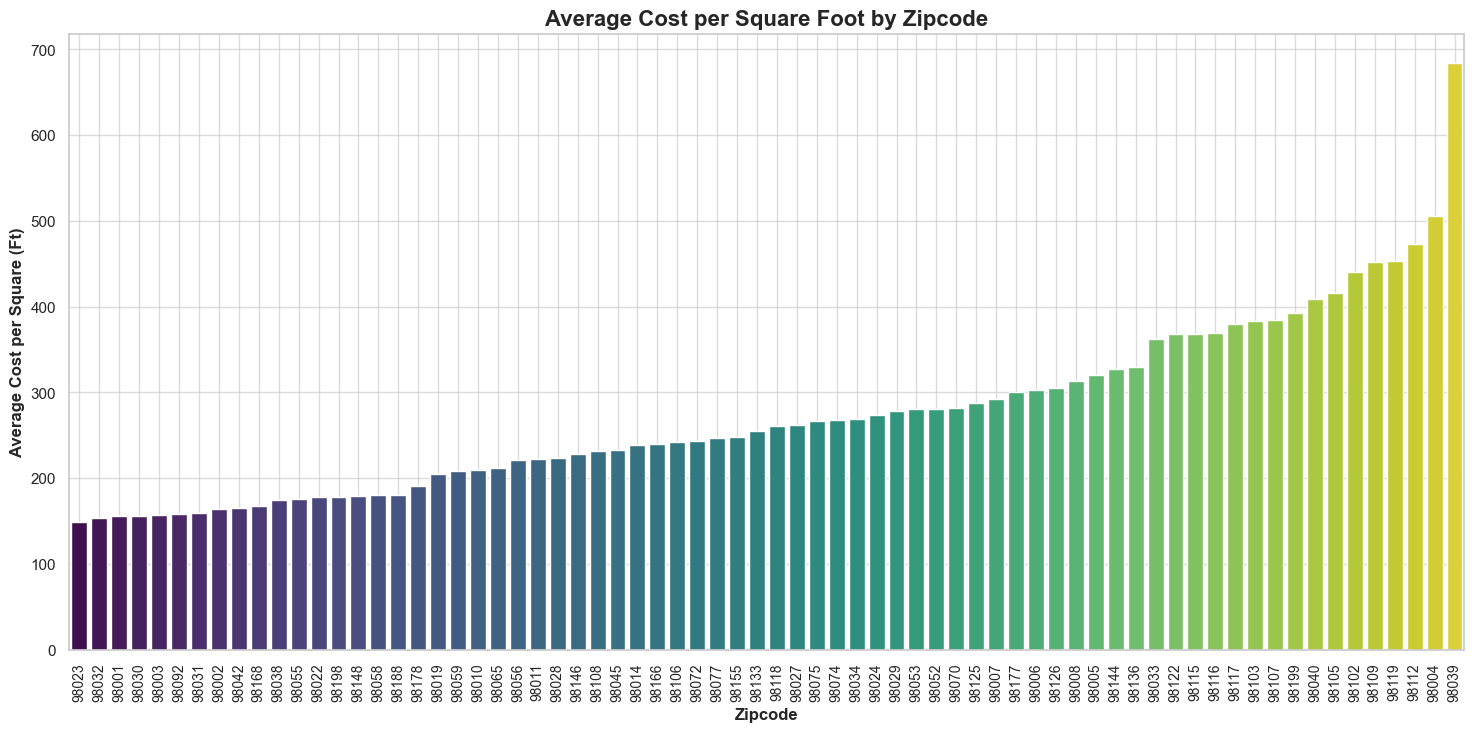

In [587]:

# Reset index to make 'zipcode' a column
df_zipcode_sorted = df_zipcode_sorted.reset_index(drop=True)

# Set the style and size of the chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 8))

# Create barplot with custom color palette
sns.barplot(
    data=df_zipcode_sorted,
    x='zipcode',
    y='cost_feet15',
    order=df_zipcode_sorted['zipcode'],
    palette="viridis"
)

# Customize the chart
plt.xticks(rotation=90, fontsize=10)  # Rotar etiquetas y ajustar tamaño de fuente
plt.title('Average Cost per Square Foot by Zipcode', fontsize=16, weight='bold')
plt.xlabel('Zipcode', fontsize=12, weight='bold')
plt.ylabel('Average Cost per Square (Ft)', fontsize=12, weight='bold')
# Adjust layout and display graphic
# plt.tight_layout()
plt.grid(alpha=0.7)
plt.show()


In [588]:
## Create a data frame within the range I consider middle class
df_middle_class = df[(df['cost_feet15'] >= 220) & (df['cost_feet15'] <= 325)]

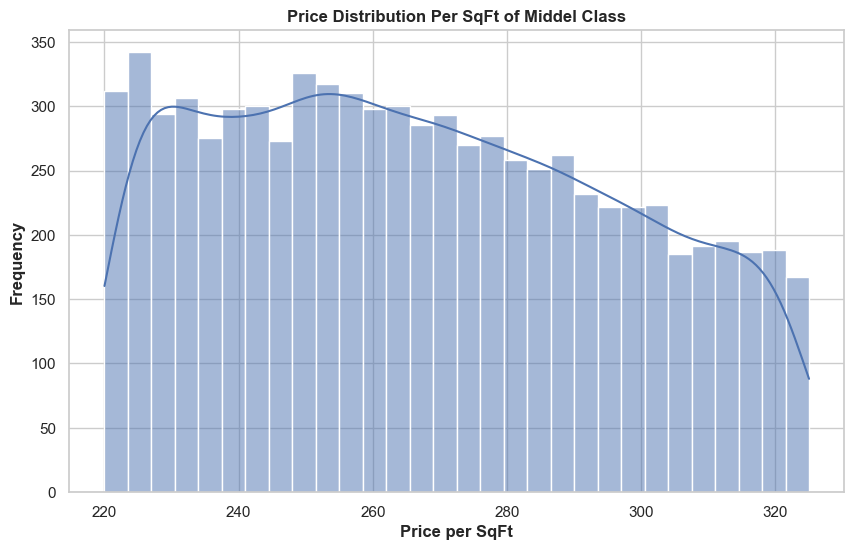

In [589]:
plt.figure(figsize=(10, 6))
sns.histplot(df_middle_class['cost_feet15'],  bins=30, kde=True)
plt.title('Price Distribution Per SqFt of Middel Class', weight='bold')
plt.xlabel('Price per SqFt', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.show()

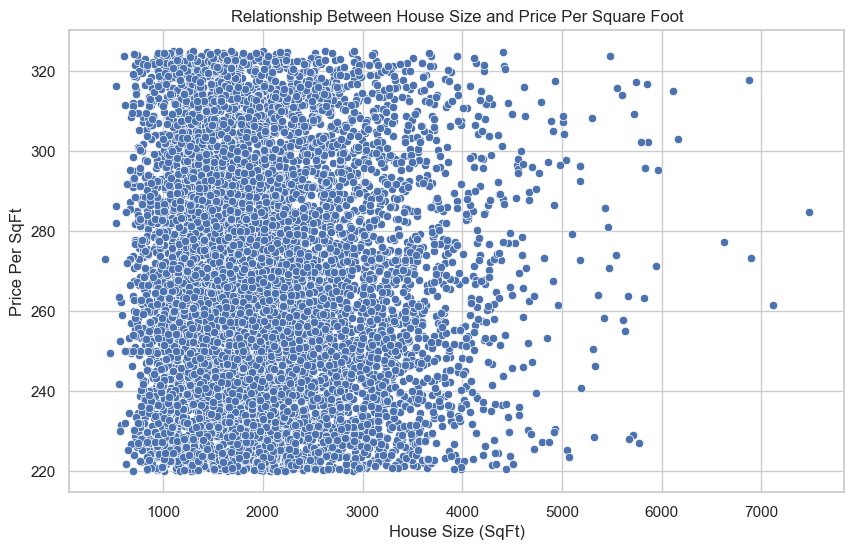

In [590]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_middle_class, x='sqft_living', y='cost_feet15')
plt.title('Relationship Between House Size and Price Per Square Foot')
plt.xlabel('House Size (SqFt)')
plt.ylabel('Price Per SqFt')
plt.show()

In [591]:
# DATE RANGE
print(df_middle_class['date'].min(), df_middle_class['date'].max())

2014-05-02 00:00:00 2015-05-15 00:00:00


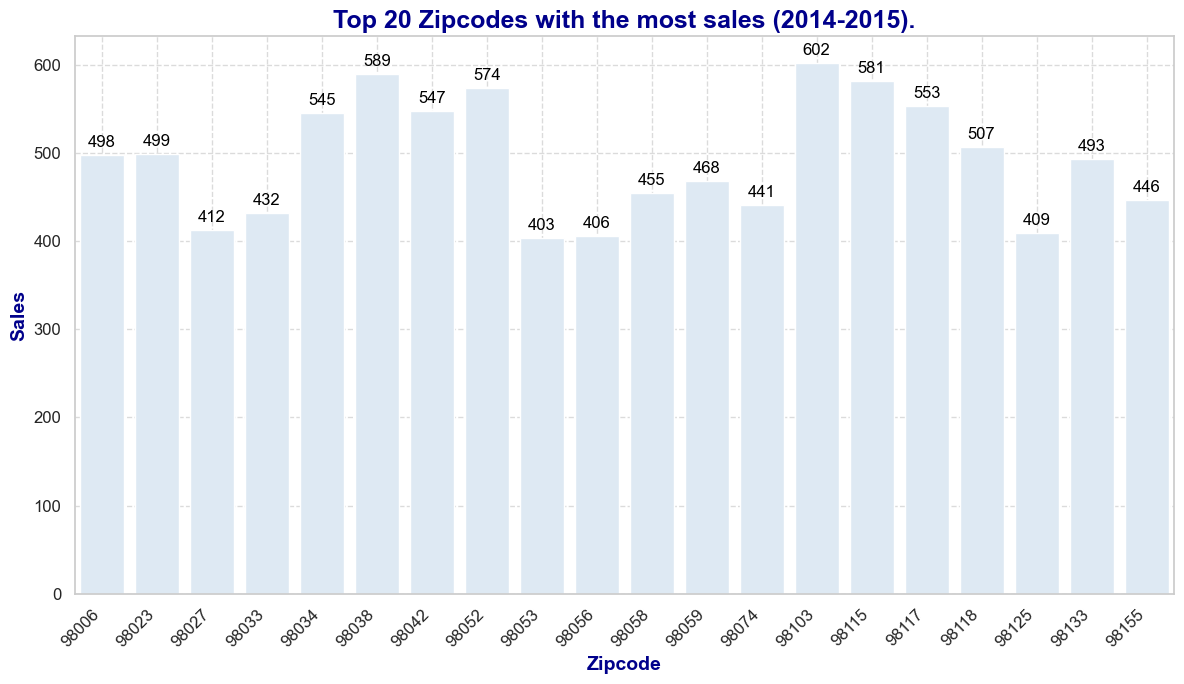

In [601]:
## Calculate SALES NUMBER: Using the date column and the zipcode column to get the number of sales per zipcode. 
## You can count how many sales occurred in each zipcode during the data range.


df_recent = df[(df['date'] >= '2014-05-02') & (df['date'] <= '2015-05-15')]

# Count the number of sales by 'zipcode'.
sales_by_zipcode = (
    df_recent.groupby('zipcode')['date']
    .count()
    .reset_index(name='sales_count')
)

# Sort the results and select the top 20 zipcodes with the most sales.
top_zipcodes = sales_by_zipcode.sort_values('sales_count', ascending=False).head(20)

# Set the seaborn style for more attractive charts.
sns.set_theme(style="whitegrid", palette="Blues")

# Create BAR chart.
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(data=top_zipcodes, x='zipcode', y='sales_count')

# CHART customization.
plt.title('Top 20 Zipcodes with the most sales (2014-2015).', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Zipcode', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Sales', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Function to add labels on the bars.
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        fontsize=12, color='black', 
        xytext=(0, 9), textcoords='offset points'
    )

plt.grid(linestyle = '--', alpha=0.7)

# Adjusting the presentation.
plt.tight_layout()
plt.show()

In [593]:
print(df['lat'])

0       47.326
1       47.326
2       47.444
3       47.443
4       47.478
         ...  
21592   47.530
21593   47.529
21594   47.530
21595   47.545
21596   47.470
Name: lat, Length: 21597, dtype: float64


cost_feet15      1.000
cost_feet        0.315
price            0.206
condition        0.080
sqft_basement    0.071
view             0.063
lat              0.059
zipcode          0.051
waterfront       0.049
yr_renovated     0.041
id               0.018
date             0.017
grade            0.014
house_id         0.014
id               0.014
floors           0.004
bathrooms       -0.006
sqft_living     -0.018
sqft_lot        -0.034
bedrooms        -0.036
sqft_lot15      -0.054
sqft_above      -0.056
sqft_living15   -0.092
yr_built        -0.102
long            -0.161
Name: cost_feet15, dtype: float64


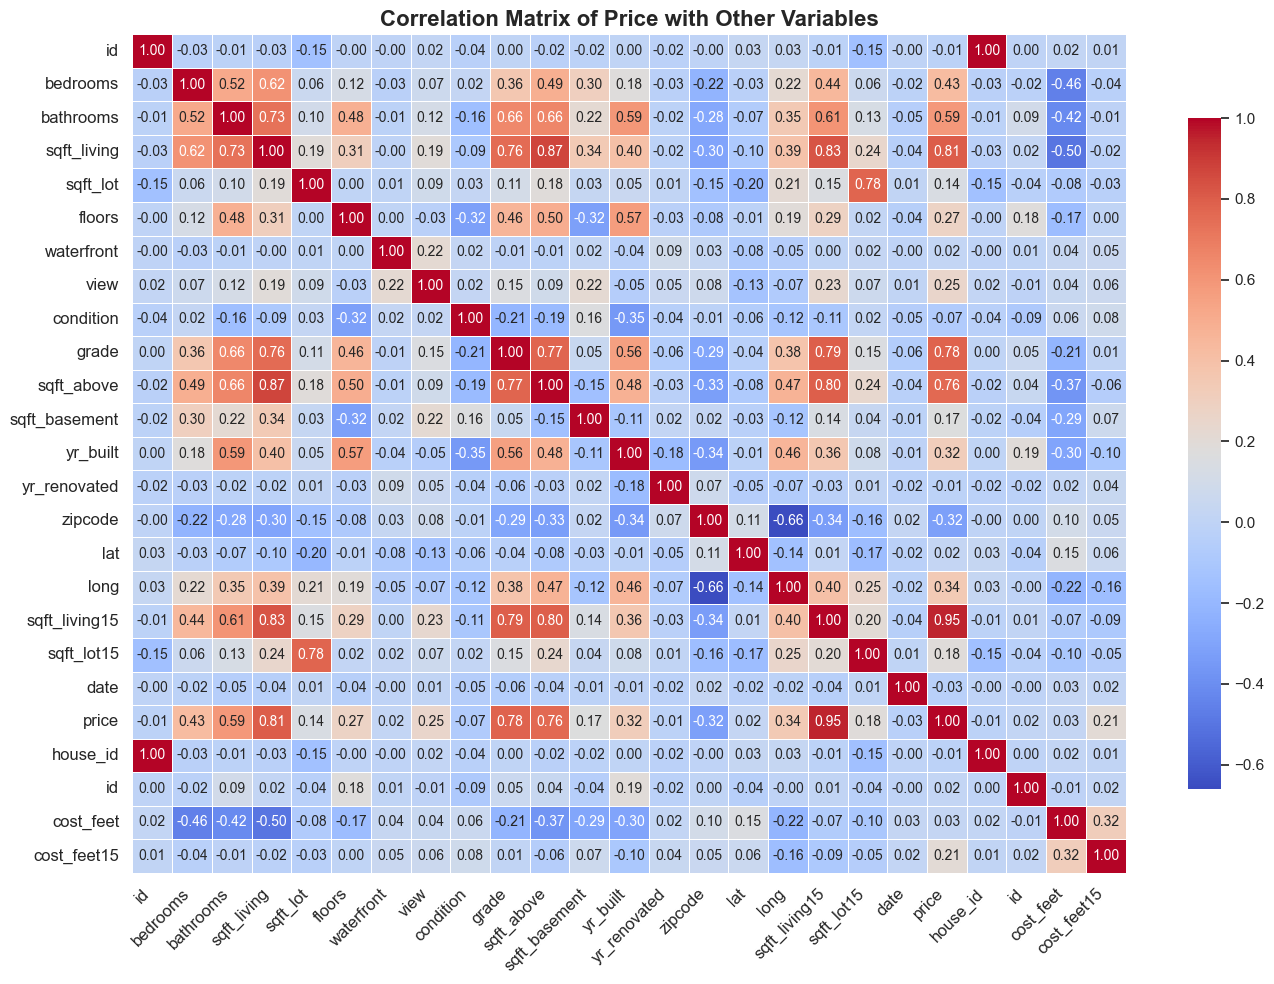

In [594]:
## looking for correlation between PRICE and the rest of columns

correlation_matrix = df_middle_class.corr()

# Extract the correlation with COST_FEET15 and sort
price_correlation = correlation_matrix['cost_feet15'].sort_values(ascending=False)

# Print correlation values
print(price_correlation)

# Create a heatmap with enhanced visibility
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 10},  # Annotation font size
    cbar_kws={"shrink": 0.8}  # Shrink color bar
)

# Enhance heatmap aesthetics
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=12
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=12
)

plt.title('Correlation Matrix of Price with Other Variables', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


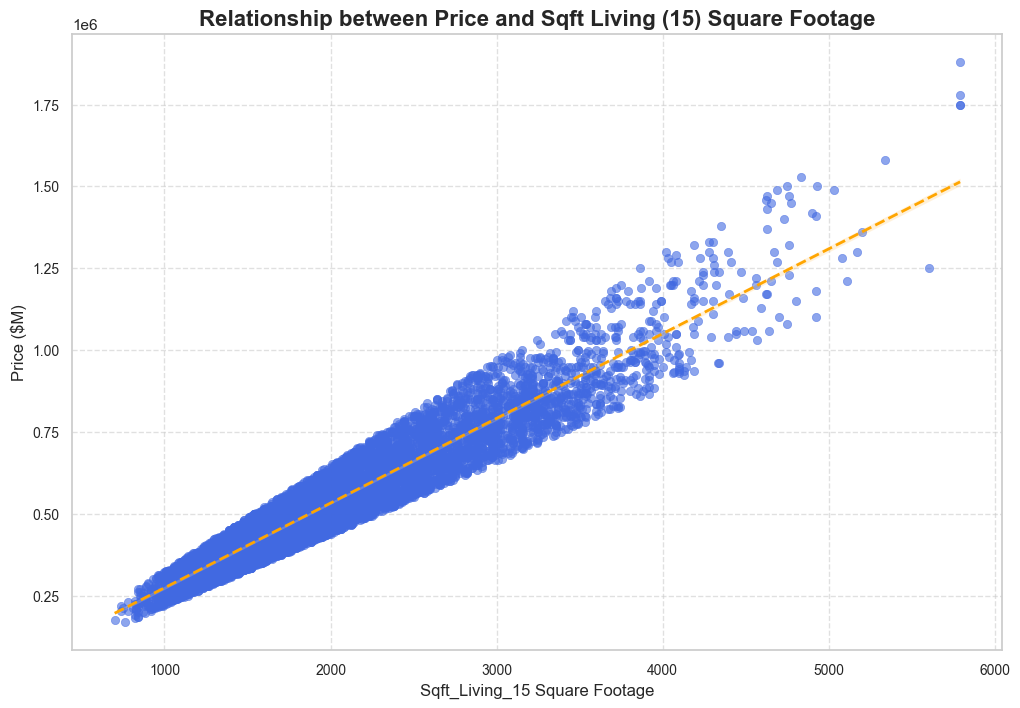

In [603]:
# Create a scatter plot between price and sqft_living15
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='sqft_living15', 
    y='price', 
    data=df_middle_class,
    alpha=0.6,  
    edgecolor=None,  
    color='royalblue'  
)

# Add a trendline for better insight into the relationship
sns.regplot(
    x='sqft_living15', 
    y='price', 
    data=df_middle_class, 
    scatter=False, 
    color='orange', 
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# Set the title and labels with improved formatting
plt.title('Relationship between Price and Sqft Living (15) Square Footage', fontsize=16, fontweight='bold')
plt.xlabel('Sqft_Living_15 Square Footage', fontsize=12)
plt.ylabel('Price ($M)', fontsize=12)

# Adjust the ticks for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [602]:
df_middle_class['price'].describe()

count      7859.000
mean     541406.412
std      196919.378
min      170000.000
25%      400000.000
50%      499950.000
75%      650000.000
max     1880000.000
Name: price, dtype: float64

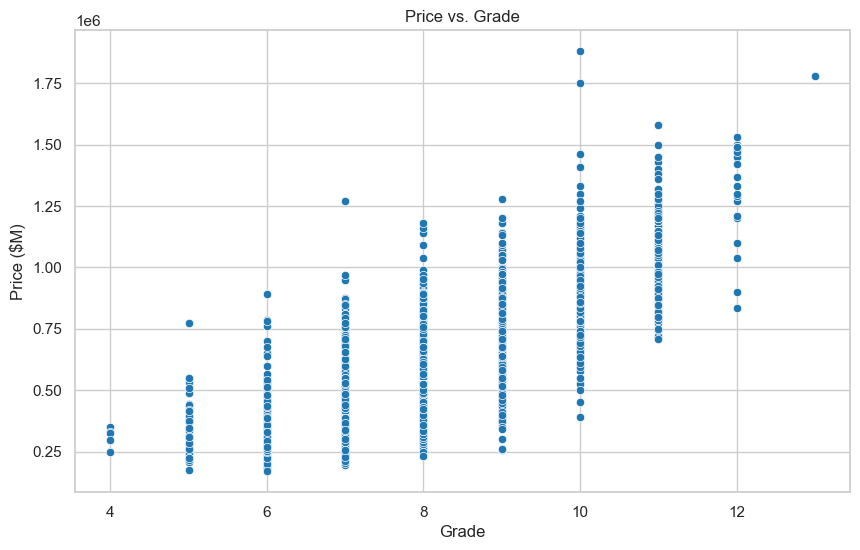

In [604]:

# Create a scatter plot between price and grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=df_middle_class, color='tab:blue')

# Set titles and labels
plt.title('Price vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Price ($M)')

# Show the plot
plt.show()


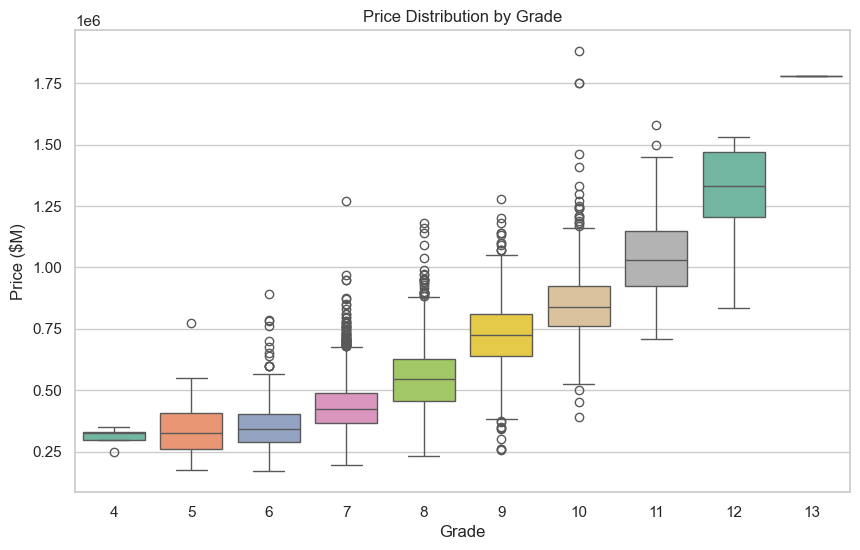

In [605]:
# Create a boxplot between price and grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df_middle_class, palette="Set2")

# Set titles and labels
plt.title('Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price ($M)')

# Show the plot
plt.show()

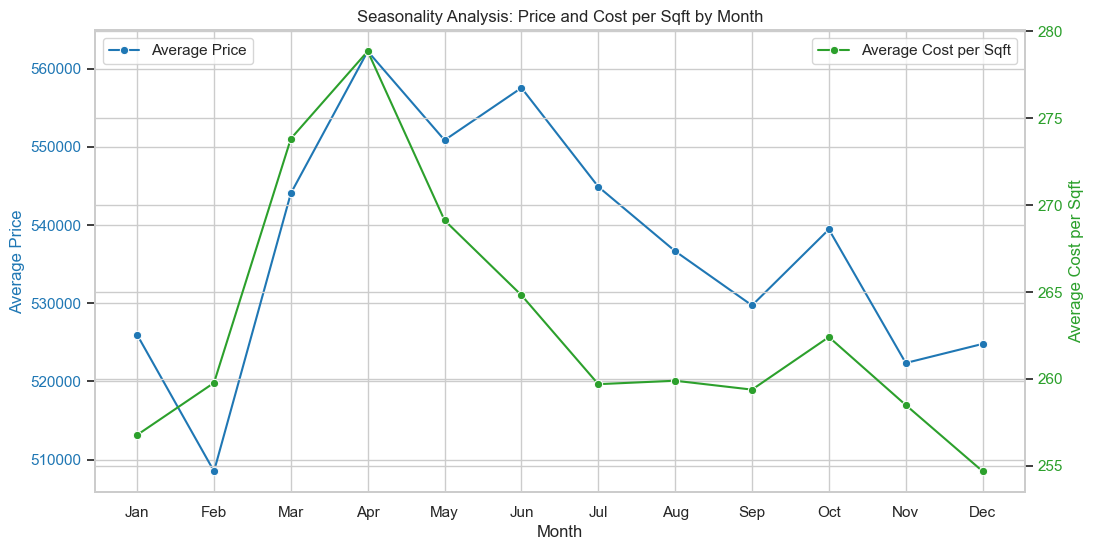

In [598]:
# Extract the month and year from 'date'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate the average price and cost per square foot (sqft) for each month
monthly_data = df.groupby('month').agg(
    avg_price=('price', 'mean'),
    avg_cost_sqft=('cost_feet', 'mean')
).reset_index()

# Set the size of the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average price on the first axis
sns.lineplot(x='month', y='avg_price', data=monthly_data, label='Average Price', marker='o', ax=ax1, color='tab:blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a second y-axis for the average cost per square foot
ax2 = ax1.twinx()
sns.lineplot(x='month', y='avg_cost_sqft', data=monthly_data, label='Average Cost per Sqft', marker='o', ax=ax2, color='tab:green')
ax2.set_ylabel('Average Cost per Sqft', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set the title
plt.title('Seasonality Analysis: Price and Cost per Sqft by Month')

# Add the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


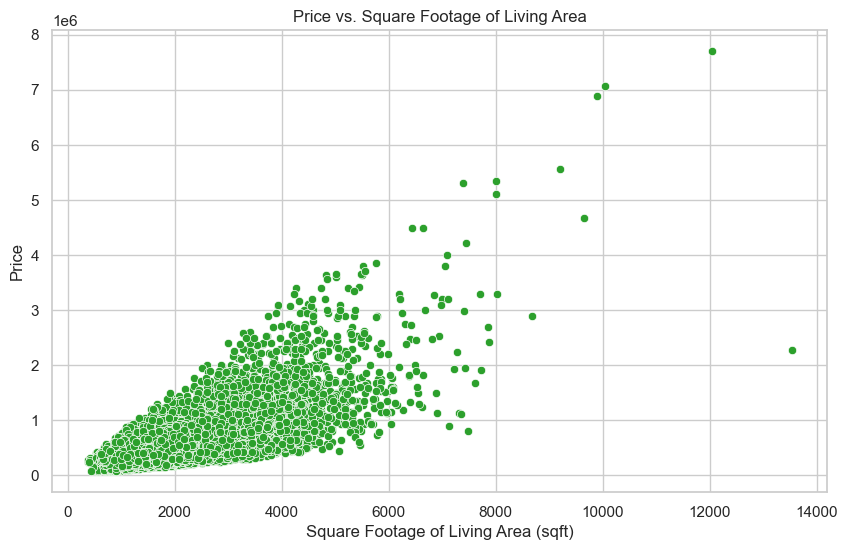

In [599]:

# Create a scatter plot between price and sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, color='tab:green')

# Set titles and labels
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area (sqft)')
plt.ylabel('Price')

# Show the plot
plt.show()


In [600]:
# Calculate standard deviation and variance for 'price' and 'sqft_living'
price_std = df['price'].std()
price_var = df['price'].var()

sqft_living_std = df['sqft_living'].std()
sqft_living_var = df['sqft_living'].var()

# Calculate the interquartile range (IQR) for 'price' and 'sqft_living'
price_q1 = df['price'].quantile(0.25)
price_q3 = df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1

sqft_living_q1 = df['sqft_living'].quantile(0.25)
sqft_living_q3 = df['sqft_living'].quantile(0.75)
sqft_living_iqr = sqft_living_q3 - sqft_living_q1

# Display the results
print(f"Price: Standard Deviation = {price_std}, Variance = {price_var}, IQR = {price_iqr}")
print(f"Sqft Living: Standard Deviation = {sqft_living_std}, Variance = {sqft_living_var}, IQR = {sqft_living_iqr}")


Price: Standard Deviation = 367368.1401013945, Variance = 134959350361.55783, IQR = 323000.0
Sqft Living: Standard Deviation = 918.1061250800805, Variance = 842918.8569095603, IQR = 1120.0
